### reset graph first

In [1]:
import tensorflow as tf
import numpy as np

import pandas
import matplotlib.pyplot as plot

%matplotlib inline

tf.reset_default_graph()

### y = Weights(權重) * x + biases(偏差值) ==> y= 3 * x + 8

### prepare training data

x_datas:  [2.0364682e-01 8.4574085e-01 3.3035284e-01 8.8431567e-01 4.6033047e-02
 2.2616713e-01 8.7330383e-01 8.1396323e-01 5.0986952e-01 8.1580389e-01
 2.2498548e-01 4.5698577e-01 7.3085129e-01 2.6645222e-01 3.5490152e-01
 3.1841138e-01 8.7067193e-01 6.2805897e-01 1.0791012e-01 9.1657430e-02
 8.8437781e-04 9.5220834e-01 1.4959726e-01 2.2250165e-01 8.8766640e-01
 3.8677093e-01 5.5659366e-01 5.0445223e-01 3.3906016e-01 6.2344390e-01
 4.7461474e-01 7.4912405e-01 5.8408856e-01 4.2783704e-01 5.2873832e-01
 8.6195612e-01 3.6165467e-01 2.9556698e-01 8.3985382e-01 5.2039945e-01
 1.4507912e-01 2.9069608e-01 3.5356247e-01 6.4885890e-01 4.5270538e-01
 4.4674128e-01 8.3474600e-01 3.2141596e-01 4.9918398e-01 3.7167805e-01
 7.7805495e-01 7.8428119e-01 9.3934065e-01 7.1836942e-01 1.8033761e-01
 7.8471494e-01 2.4828906e-01 2.0097491e-01 8.9822763e-01 4.7596020e-01
 7.4441934e-01 7.8206635e-01 4.4285029e-01 2.1468745e-01 7.4404925e-01
 6.5260208e-01 5.1427430e-01 2.0559895e-01 3.9784524e-01 8.9899808e

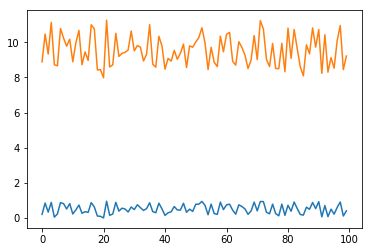

In [2]:
# y = 3 * x + 8 + random
# generate training data
x_datas = np.random.rand(100).astype(np.float32)
random = np.random.normal(0, 0.3, x_datas.shape)
y_datas = 3 * x_datas + 8 + random

print('x_datas: ', x_datas, x_datas.shape)
print('y_datas: ', y_datas, y_datas.shape)

plot.plot(x_datas)
plot.plot(y_datas)

### matplotlib

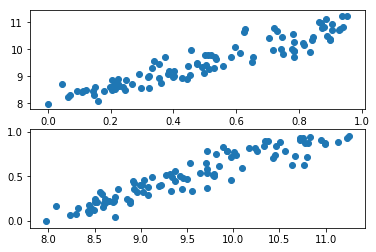

In [3]:
# draw x_datas & y_datas as figure
figure = plot.figure()
subplot1 = figure.add_subplot(211) # (rows, cols, index)
subplot1.scatter(x_datas, y_datas)
subplot2 = figure.add_subplot(2, 1, 2) # (rows, cols, index)
subplot2.scatter(y_datas, x_datas)
plot.show()

### create computal graph

In [4]:
# y = Weights * x + biases
with tf.name_scope('weights'):
    # weights = tf.Variable(tf.ones([1]), dtype = tf.float32, name='weights')
    random_weight = tf.random_uniform([1], -1.0, 1.0)
    weights = tf.Variable(random_weight, dtype = tf.float32, name='weights')
    tf.summary.histogram(name = '/weights', values = weights)

with tf.name_scope('biases'):
    biases = tf.Variable(tf.zeros([1]), dtype = tf.float32, name='biases')
    tf.summary.histogram(name = '/biases', values = biases)

with tf.name_scope('y_prediction'):    
    y = weights * x_datas + biases
    tf.summary.histogram(name = '/y_prediction', values = y)

INFO:tensorflow:Summary name /weights is illegal; using weights instead.
INFO:tensorflow:Summary name /biases is illegal; using biases instead.
INFO:tensorflow:Summary name /y_prediction is illegal; using y_prediction instead.


### prepare loss function and optimizer

In [5]:
# GradientDescent(梯度下降法) = (猜測值 - 實際值)^2
# tf.reduce_mean(將tensor取平均) ==> 降低維度 1-D -> 0-D
# tf.square(平方)
with tf.name_scope('loss'):  
    loss = tf.reduce_mean(tf.square(y - y_datas))
    tf.summary.scalar('loss', loss)

# tf.train.GradientDescentOptimizer(梯度下降法優化器)
# LearningRate(學習率) ==> 0.0 ~ 1.0
with tf.name_scope('train'):  
    optimizer = tf.train.GradientDescentOptimizer(0.5)
    train = optimizer.minimize(loss)

### run and train tensorflow session

In [6]:
results = []

with tf.Session() as session:
    session.run(tf.global_variables_initializer()) # Important!
    merged = tf.summary.merge_all()
    writer = tf.summary.FileWriter('tb_logs/', session.graph)
    
    for step in range(1001): # 0 ~ 1000, exclude 1001
        session.run(train)
        if step % 10 == 0:
            print(step,
                    'weights: ', session.run(weights),
                    'biases: ', session.run(biases),
                    'loss: ', session.run(loss))
            results.append({
                'weights': session.run(weights),
                'biases': session.run(biases),
                'loss': session.run(loss)
            })
        # Write summary to file.
        result = session.run(merged)
        writer.add_summary(result, step)

0 weights:  [5.3454714] biases:  [9.305833] loss:  6.6732826
10 weights:  [3.6815972] biases:  [7.6441474] loss:  0.1307411
20 weights:  [3.3526876] biases:  [7.8210177] loss:  0.10286501
30 weights:  [3.1716304] biases:  [7.918384] loss:  0.09441778
40 weights:  [3.0719612] biases:  [7.9719825] loss:  0.09185793
50 weights:  [3.0170956] biases:  [8.001488] loss:  0.09108227
60 weights:  [2.9868922] biases:  [8.01773] loss:  0.090847224
70 weights:  [2.970266] biases:  [8.02667] loss:  0.090776004
80 weights:  [2.9611144] biases:  [8.031592] loss:  0.0907544
90 weights:  [2.9560757] biases:  [8.034302] loss:  0.090747826
100 weights:  [2.9533024] biases:  [8.035793] loss:  0.09074593
110 weights:  [2.9517753] biases:  [8.036614] loss:  0.09074528
120 weights:  [2.950935] biases:  [8.037066] loss:  0.09074507
130 weights:  [2.9504724] biases:  [8.037314] loss:  0.09074504
140 weights:  [2.9502177] biases:  [8.037452] loss:  0.09074501
150 weights:  [2.9500778] biases:  [8.037527] loss: 

### pandas

In [7]:
pd = pandas.DataFrame(results)
pd

,biases,loss,weights
0,[9.305833],6.673283,[5.3454714]
1,[7.6441474],0.130741,[3.6815972]
2,[7.8210177],0.102865,[3.3526876]
3,[7.918384],0.094418,[3.1716304]
4,[7.9719825],0.091858,[3.0719612]
5,[8.001488],0.091082,[3.0170956]
6,[8.01773],0.090847,[2.9868922]
7,[8.02667],0.090776,[2.970266]
8,[8.031592],0.090754,[2.9611144]
9,[8.034302],0.090748,[2.9560757]


In [8]:
pd['weights'] = pd['weights'].map(lambda x: x[0])
pd['biases'] = pd['biases'].map(lambda x: x[0])

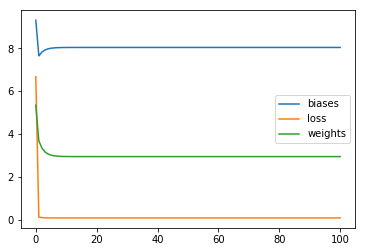

In [9]:
pd.plot()